In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
diamonds = pd.read_csv('diamonds.csv')

In [3]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
diamonds.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [6]:
diamonds['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [7]:
diamonds['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [8]:
diamonds['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [9]:
diamonds['cut'].replace(to_replace=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], value=[1, 2, 3, 4, 5], inplace=True)

In [10]:
diamonds['cut'].value_counts()

5    21551
4    13791
3    12082
2     4906
1     1610
Name: cut, dtype: int64

In [11]:
diamonds['color'].replace(to_replace=['J', 'I', 'H', 'G', 'F', 'E', 'D'], value=[1, 2, 3, 4, 5, 6, 7], inplace=True)

In [12]:
diamonds['color'].value_counts()

4    11292
6     9797
5     9542
3     8304
7     6775
2     5422
1     2808
Name: color, dtype: int64

In [13]:
diamonds['clarity'].replace(to_replace=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'], 
                            value=[1, 2, 3, 4, 5, 6, 7, 8], inplace=True)

In [14]:
diamonds['clarity'].value_counts()

3    13065
4    12258
2     9194
5     8171
6     5066
7     3655
8     1790
1      741
Name: clarity, dtype: int64

In [15]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


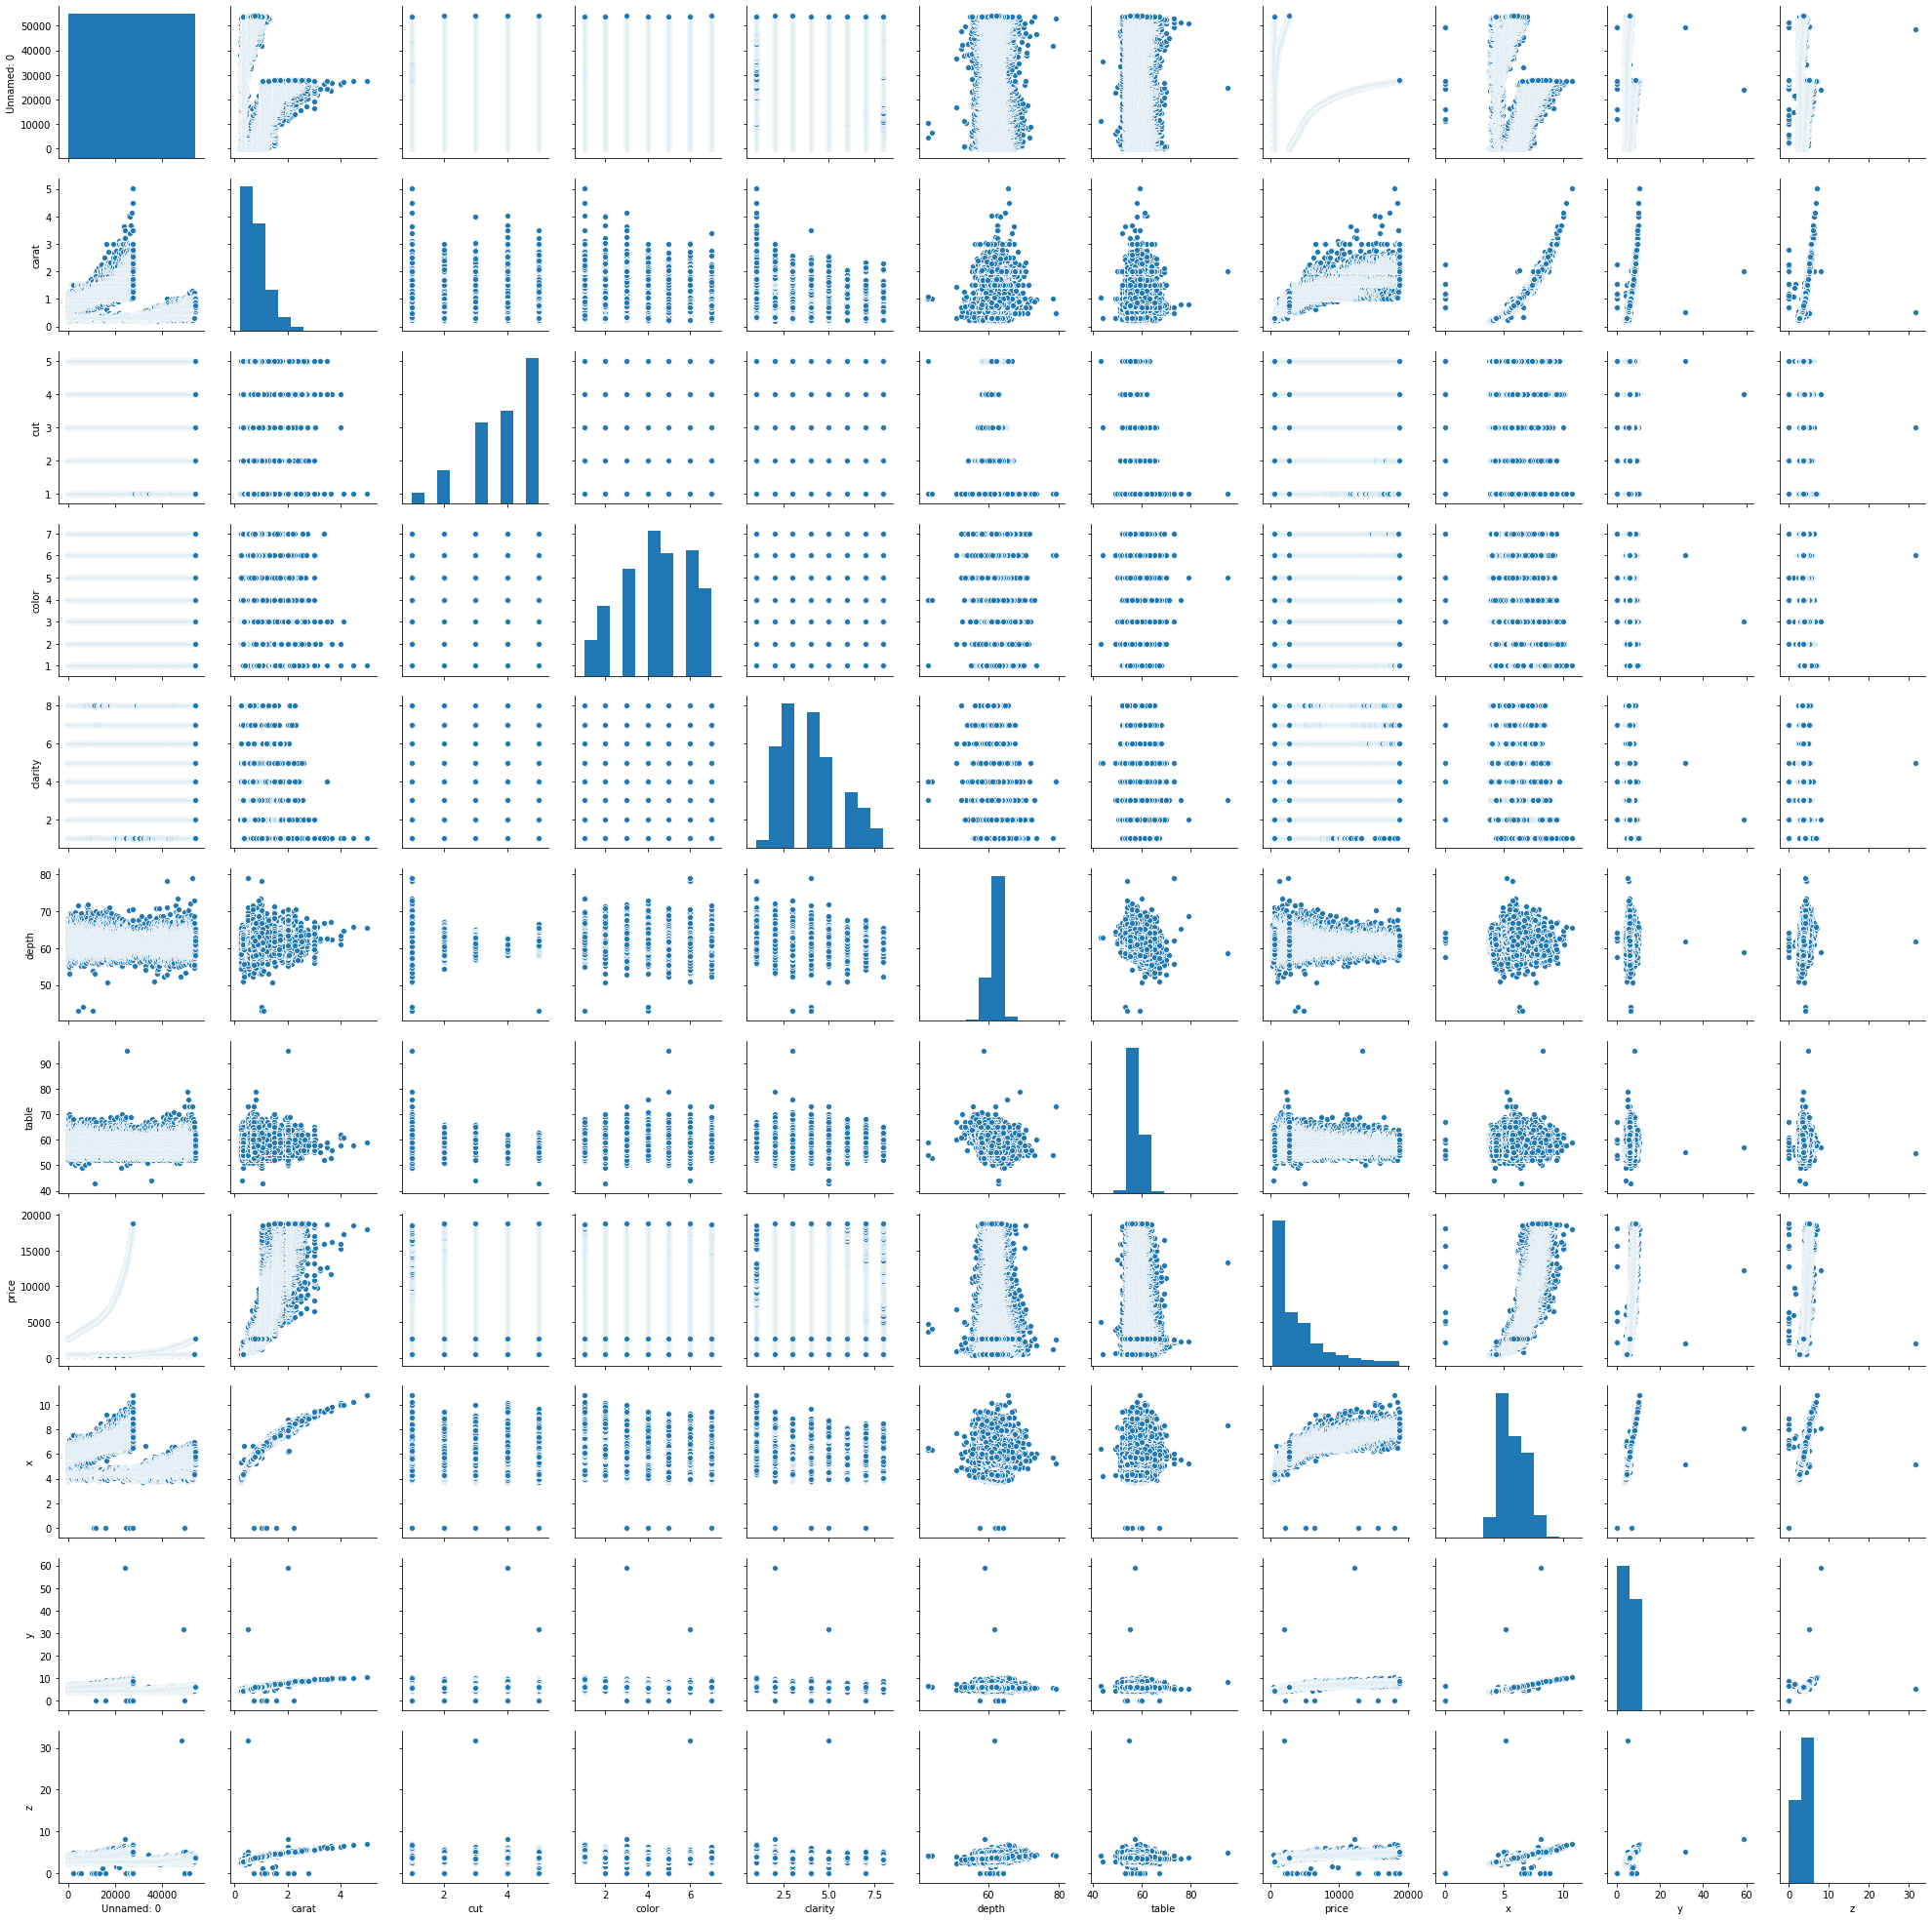

In [16]:
sns.pairplot(diamonds)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
diamonds.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [19]:
'cut', 'color', 'clarity',

('cut', 'color', 'clarity')

In [20]:
X = diamonds[['carat', 'depth', 'table',
       'x', 'y', 'z']]

In [21]:
y = diamonds['price']

In [22]:
X.shape, y.shape

((53940, 6), (53940,))

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [24]:
X_train.shape, y_test.shape

((37758, 6), (16182,))

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lm = LinearRegression()

In [27]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
lm.coef_

array([10538.68953604,  -198.46175901,  -100.04896134, -1480.87631676,
         255.33706956,    93.14365855])

In [29]:
lm.intercept_

20216.504270048103

In [30]:
y_pred = lm.predict(X_test)

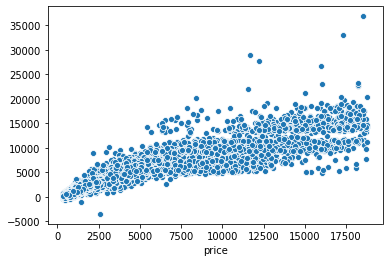

In [31]:
sns.scatterplot(y_test, y_pred)

In [32]:
from sklearn import metrics

In [33]:
print('MSE:', metrics.mean_squared_error(y_test, y_pred).round(2))

MSE: 2252431.1


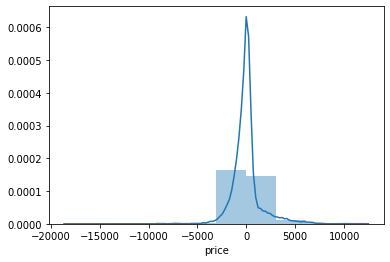

In [39]:
sns.distplot(y_test - y_pred, bins = 10)

Text(0, 0.5, 'Observed prices')

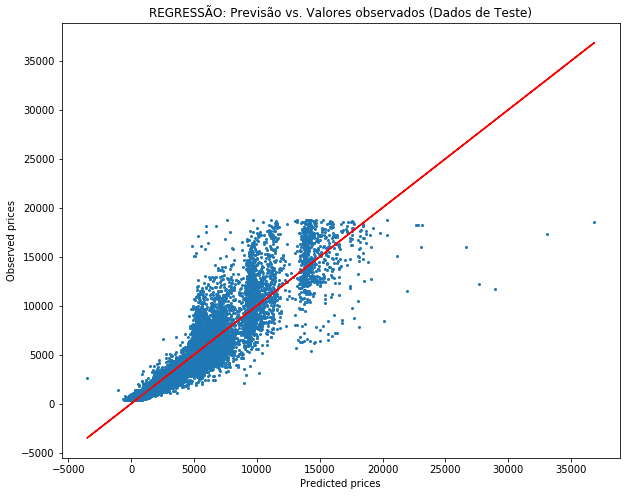

In [40]:
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(y_pred, y_test,s=4)
ax.plot(y_pred,y_pred,color='red')
ax.set_title("REGRESSÃO: Previsão vs. Valores observados (Dados de Teste)")
ax.set_xlabel('Predicted prices')
ax.set_ylabel("Observed prices")